<a href="https://colab.research.google.com/github/songseokbeom/ML_study/blob/master/3_3_LogisticRegression_model_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [0]:

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  markers=('s', 'x', 'o', '^', 'v')
  colors=('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))]) # np.unique: find unique elements in numpy array

  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))

  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl, 0],
                y=X[y==cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')
  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1],
                c='', edgecolor='black', alpha=1.0,
                linewidth=1, marker='o',
                s=100, label='test set')
  

In [0]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
X_combined_std = np.vstack([X_train_std, X_test_std])
Y_combined_std = np.hstack([Y_train, Y_test])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


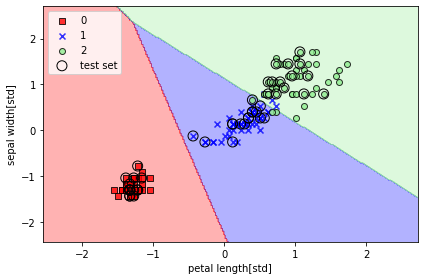

In [68]:
LR_model = LogisticRegression(solver='liblinear', multi_class='auto',
                              C=100.0, random_state=1)
LR_model.fit(X_train_std, Y_train)
plot_decision_regions(X_combined_std,
                      Y_combined_std,
                      classifier=LR_model,
                      test_idx=range(105, 150))
plt.xlabel('petal length[std]')
plt.ylabel('sepal width[std]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

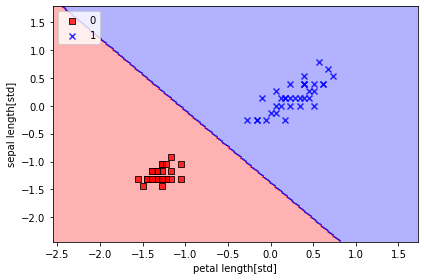

In [47]:
plot_decision_regions(X=X_train_01,
                      y=Y_train_01,
                      classifier=logistic_model)
plt.xlabel('petal length[std]')
plt.ylabel('sepal length[std]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()